# SECTION 09, Logstic Regression course

In [2]:
import random

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns
import numpy as np
import re
from matplotlib.animation import FuncAnimation
from sklearn.datasets import fetch_openml

dataset = fetch_openml(name='boston', version=1, as_frame=True, return_X_y=False, parser='pandas')

In [3]:
data = dataset['data']
target = dataset['target']
columns = dataset['feature_names']

dataframe = pd.DataFrame(data)
dataframe.columns = columns
dataframe['price'] = target

rm = dataframe['RM']
lstat = dataframe['LSTAT']
price = dataframe['price']

In [4]:
print(np.percentile(price, 66))
greater_then_most = np.percentile(price, 66)

23.53


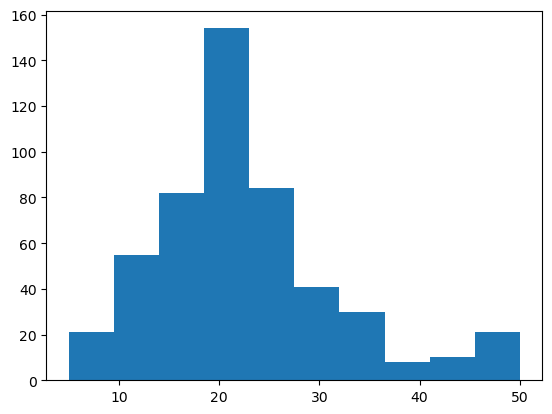

In [5]:
plt.hist(price)
plt.show()

In [6]:
dataframe['expensive'] = dataframe['price'].apply(lambda p: int(p > greater_then_most))
expensive = dataframe['expensive']

# print(dataframe.head())
print(dataframe['expensive'])

0      1
1      0
2      1
3      1
4      1
      ..
501    0
502    0
503    1
504    0
505    0
Name: expensive, Length: 506, dtype: int64


In [7]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

def model(x, w, b):
    return logistic(np.dot(x, w.T) + b)

def loss(yhat, y):
    return -np.sum(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))

def partial_w(x, y, yhat):
    return np.array([np.sum((yhat - y) * x[0]), np.sum((yhat - y) * x[1])])

def partial_b(x, y, yhat):
    return np.sum((yhat - y))

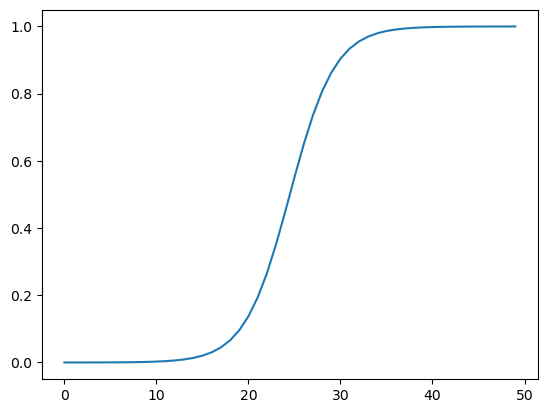

In [8]:
import matplotlib.pyplot as plt
plt.plot(logistic(np.linspace(-10, 10)))
plt.show()

In [9]:
w = np.random.random_sample((1, 2))
b = 0

In [10]:
learning_rate = 1e-5
epoch = 200
losses = []

history_k_b_loss = []

for i in range(epoch):
    batch_loss = []
    for batch in range(len(rm)):
        index = random.choice(range(len(rm)))

        x = np.array([rm[index], lstat[index]])
        y = expensive[index]

        yhat = model(x, w, b)
        loss_v = loss(yhat, y)

        w = w + -1 * partial_w(x, y, yhat) * learning_rate
        b = b + -1 * partial_b(x, y, yhat) * learning_rate

        batch_loss.append(loss_v)
        history_k_b_loss.append((w, b, loss_v))

        if batch % 100 == 0:
            print('Epoch: {}, Batch: {}, loss:{}'.format(i, batch, loss_v))
    losses.append(np.mean(batch_loss))

Epoch: 0, Batch: 0, loss:0.011939238277337422
Epoch: 0, Batch: 100, loss:9.278865439200557
Epoch: 0, Batch: 200, loss:3.8058657515395007
Epoch: 0, Batch: 300, loss:4.512235568335979
Epoch: 0, Batch: 400, loss:0.08770938213780602
Epoch: 0, Batch: 500, loss:4.727538294791969
Epoch: 1, Batch: 0, loss:0.002834166379715365
Epoch: 1, Batch: 100, loss:0.11461446989083857
Epoch: 1, Batch: 200, loss:8.238135903872829
Epoch: 1, Batch: 300, loss:14.542395629643105
Epoch: 1, Batch: 400, loss:4.086794190267909
Epoch: 1, Batch: 500, loss:0.0426521232313891
Epoch: 2, Batch: 0, loss:4.59275526311203
Epoch: 2, Batch: 100, loss:7.290114482566461
Epoch: 2, Batch: 200, loss:0.0968137468025581
Epoch: 2, Batch: 300, loss:5.67651834082444
Epoch: 2, Batch: 400, loss:6.672095402966642
Epoch: 2, Batch: 500, loss:4.152033061926793
Epoch: 3, Batch: 0, loss:4.614440251752955
Epoch: 3, Batch: 100, loss:4.304755355578808
Epoch: 3, Batch: 200, loss:0.0830541894095814
Epoch: 3, Batch: 300, loss:6.615359900250616
Epoch

In [11]:
random_test_indices = np.random.choice(range(len(rm)), size=100)
decision_boundary = 0.5



for i in random_test_indices:
    x1, x2, y = rm[i], lstat[i], expensive[i]
    predicate = model(np.array([x1, x2]), w, b)
    predicate_label = int(predicate > decision_boundary)

    print('RM:{}, LSTAT:{}, EXPENSIVE:{}, Predicated:{}'.format(x1, x2, y, predicate_label))

boston_labels = np.array

RM:4.138, LSTAT:37.97, EXPENSIVE:0, Predicated:0
RM:5.985, LSTAT:9.74, EXPENSIVE:0, Predicated:0
RM:6.341, LSTAT:17.79, EXPENSIVE:0, Predicated:0
RM:7.104, LSTAT:8.05, EXPENSIVE:1, Predicated:1
RM:6.229, LSTAT:15.55, EXPENSIVE:0, Predicated:0
RM:6.182, LSTAT:9.47, EXPENSIVE:1, Predicated:0
RM:7.163, LSTAT:6.36, EXPENSIVE:1, Predicated:1
RM:7.393, LSTAT:16.74, EXPENSIVE:0, Predicated:0
RM:6.335, LSTAT:16.96, EXPENSIVE:0, Predicated:0
RM:6.376, LSTAT:6.87, EXPENSIVE:0, Predicated:1
RM:6.195, LSTAT:13.0, EXPENSIVE:0, Predicated:0
RM:6.852, LSTAT:19.78, EXPENSIVE:1, Predicated:0
RM:6.657, LSTAT:21.22, EXPENSIVE:0, Predicated:0
RM:6.951, LSTAT:9.71, EXPENSIVE:1, Predicated:0
RM:5.344, LSTAT:23.09, EXPENSIVE:0, Predicated:0
RM:6.826, LSTAT:4.16, EXPENSIVE:1, Predicated:1
RM:5.888, LSTAT:14.8, EXPENSIVE:0, Predicated:0
RM:6.151, LSTAT:18.46, EXPENSIVE:0, Predicated:0
RM:6.393, LSTAT:5.19, EXPENSIVE:1, Predicated:1
RM:6.208, LSTAT:15.17, EXPENSIVE:0, Predicated:0
RM:4.628, LSTAT:34.37, EXPENSI

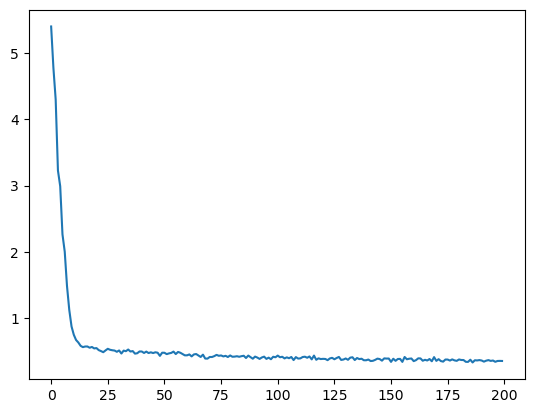

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(losses)

In [13]:
true_label = np.array([1, 0, 1, 0, 1]) # Binary classification
predicate_1 = np.array([0.8, 0.7, 0.8, 0.3, 0.8])

In [14]:
def test_lose(y, yhat):
    return -np.sum(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))

In [15]:
test_lose(true_label, predicate_1)

2.2300784022072975